# Linear Regression with One Variable

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. The file **ex1data1.txt** (available under week 2's assignment material) contains the dataset for our linear regression exercise. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [8]:
# !pip install matplotlib

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('ex1data1.txt', header = None) #read from dataset
X = data.iloc[:,0] # read first column
y = data.iloc[:,1] # read second column
m = len(y) # number of training example
data.head() # view first few rows of the data

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Plot Dataset using scatter to visualize the pattern in it

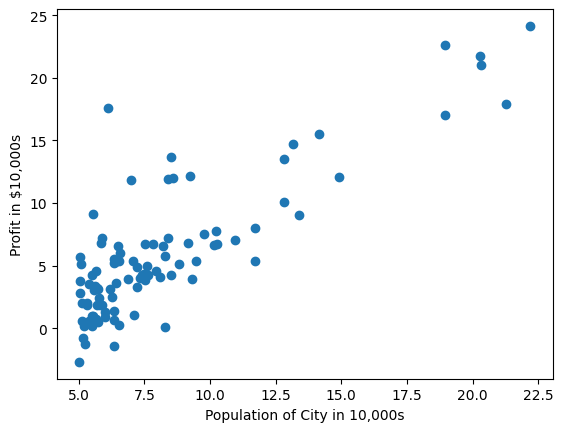

In [4]:
# Plot Data
plt.scatter(X, y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

### Add Intercept and Parameters initilization

we add another dimension to our data to accommodate the intercept term (the reason for doing this is explained in the videos). We also initialize the initial parameters theta to 0 and the learning rate alpha to 0.01.

In [5]:
#### DONT CHANGE THIS CODE ####
X = np.array(X)
y = np.array(y)
X = X[:,np.newaxis]
y = y[:,np.newaxis]
# Hyperparameters
iterations = 1500
alpha = 0.01

In [6]:
## Write the code ##
# Initlize Parameters () to ZERO
theta=np.zeros((2,1))

# Initilize one to be multiplied with intercept
ones=np.ones((m,1))

# Stack ones withe actual data set as it will look like following output.
X=np.hstack((ones,X))


In [7]:
X

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

In [8]:
theta # Intialized Theta should be ZERO.

array([[0.],
       [0.]])

### COST FUNCTION ####
Implement the MSE cost function for above mentioned dataset. The formula is as followed.
![Mean_Squared_Error](res/MSE.png "MSE")


In [9]:
### WRITE CODE HERE ###
# NOTE:- You may use vectorized implemention of cost function using numpy library.
# Hint:- np.dot function will help you to implement vectorized dot product of theta and input features.
def computeCost(X, y, theta):
    temp = np.dot(X,theta)-y
    temp = np.dot(temp.T,temp)
    temp = temp/(2*m)
    return temp
    

    



In [10]:
# Initial Cost
J = computeCost(X, y, theta)
print(J)

[[32.07273388]]


### Finding the optimal parameters using Gradient Descent¶
The Paritial Derivative of the Cost function is: 
![derivatives](res/derivatives.png "MSE")

In [11]:
### WRITE CODE HERE ###
# NOTE:- According to passed parameters .
# Hint:- Don't Directly update the actual theta but use temp variable during update.
def gradientDescent(X, y, theta, alpha, iterations):
    for _ in range(iterations):
        temp = np.dot(X,theta)-y
        temp = np.dot(X.T,temp)
        theta = theta - (alpha/m)*temp
        
    return theta

theta = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


Expected theta values [-3.6303, 1.1664]



In [12]:
# Calculate the Cost after converging of thetas for number of iterations.
J = computeCost(X, y, theta)
print(J)

[[4.48338826]]


### Plot showing the best fit line¶


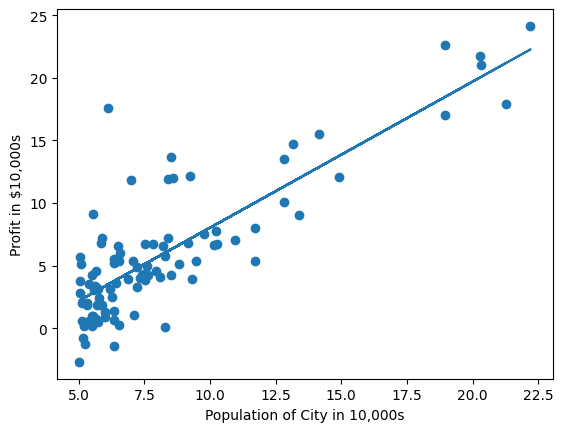

In [13]:
## Expected Output plot....##
plt.scatter(X[:,1], y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1], np.dot(X, theta))
plt.savefig('graph.png')
plt.show()

## Linear Regression with Multiple Predictors (Variable)

**Problem context:** Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. Your job is to predict housing prices based on other variables.


The first column is the **size of the house (in square feet)**, the second column is the **number of bedrooms**, and the third column is the **price** of the house.

In [14]:
import numpy as np
import pandas as pd
data = pd.read_csv('ex1data2.txt', sep = ',', header = None)
X = data.iloc[:,0:2] # read first two columns into X
y = data.iloc[:,2] # read the third column into y
m = len(y) # no. of training samples
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [15]:
X.head(5)

,0,1
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [16]:
y.head(5)

0    399900
1    329900
2    369000
3    232000
4    539900
Name: 2, dtype: int64

As can be seen above we are dealing with more than one independent variables here (but the concepts you have learnt in the previous section applies here as well)

## Feature Scaling and Normalization

By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.


Feature Scaling can be performed with following steps.
1. Subtract the mean value of each feature from the dataset.
1. After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

In [17]:
X.head(5)

,0,1
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [18]:
X_iv = (X - np.mean(X))/np.std(X)


/Users/saifahmed/Downloads/LAB01_Regression/xenv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [19]:
X_iv.head(5)

,0,1
0,1.401769,-1326.871320
1,0.760713,-1326.871320
2,1.778262,-1326.871320
3,0.526677,-1328.199619
4,2.541424,-1325.543022


### Apply the Z-Score Scaling the features. And use following Z-Score Scaling foru
![scaling](res/scaling.png "MSE")

In [20]:
### WRITE CODE HERE ###
# Feature scaling for each column independently
def featureNormalize(X):
    X_scaled = (X - np.mean(X))/np.std(X)
    return X_scaled

# print("Scaled X:\n", X_scaled)

X = featureNormalize(X)

print("Normalized X:\n", X)

# Expected Output is provided for refernce.


Normalized X:
            0            1
0   1.401769 -1326.871320
1   0.760713 -1326.871320
2   1.778262 -1326.871320
3   0.526677 -1328.199619
4   2.541424 -1325.543022
5   1.250409 -1325.543022
6   0.676765 -1326.871320
7   0.540668 -1326.871320
8   0.480887 -1326.871320
9   0.625888 -1326.871320
10  1.193171 -1325.543022
11  1.269488 -1326.871320
12  1.129575 -1326.871320
13  4.421347 -1324.214723
14  0.338430 -1326.871320
15  1.651069 -1325.543022
16  0.404571 -1328.199619
17  0.297728 -1326.871320
18  2.044097 -1325.543022
19  2.580854 -1325.543022
20  0.973126 -1326.871320
21  1.127031 -1328.199619
22  0.765801 -1326.871320
23  1.221154 -1325.543022
24  3.673448 -1326.871320
25  0.124745 -1326.871320
26  0.580098 -1326.871320
27  1.938526 -1326.871320
28  1.523875 -1326.871320
29  2.079711 -1326.871320
30  1.064706 -1328.199619
31 -0.002449 -1329.527917
32  1.320365 -1325.543022
33  2.715680 -1326.871320
34  1.029092 -1325.543022
35  0.553387 -1326.871320
36  0.301544 -1326.8713

/Users/saifahmed/Downloads/LAB01_Regression/xenv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [111]:
### WRITE CODE HERE ###
# In above features add a column of ones in dataset for intercept term.
def addOnes(X):
    ones = np.ones((X.shape[0],1))
    X = np.concatenate((ones,X),axis = 1)
    return X

X = addOnes(X)
print(X)



array([[ 1.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 1.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 1.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 1.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 1.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 1.00000000e+00, -8.65782986e-01

In [28]:
# Hyperparamters. Don't change there for submission
alpha = 0.01
num_iters = 400
y = np.array(y)
y = y[:,np.newaxis]


In [29]:
## WRITE CODE HERE ##
# Initialize Thetas to ZERO for above dataset.

theta = np.zeros((3,1))
print(theta)


[[0.]
 [0.]
 [0.]]


In [37]:
## WRITE CODE HERE ###
# Complete cost function for more than one input features.
def computeCostMulti(X, y, theta):
    if X.shape[1] != theta.shape[0]:
        raise ValueError("Number of columns in X should match the number of rows in theta")
    m = len(y)
    predictions = np.dot(X,theta)
    square_err = (predictions - y)**2
    J = 1/(2*m) * np.sum(square_err)
    return J

# Compute the cost
J = computeCostMulti(X, y, theta)
print(J)

# Expected Output.

ValueError: Number of columns in X should match the number of rows in theta

In [33]:
# Complete the Gradient Descent and use the equations used in previous exercise.
def gradientDescentMulti(X, y, theta, alpha, iterations):
    m = len(y) # length of dataset (No of Samples)
    for _ in range(iterations):
        temp = np.dot(X,theta)-y
        temp = np.dot(X.T,temp)
        theta = theta - (alpha/m)*temp
    return theta


theta = gradientDescentMulti(X, y, theta, alpha, num_iters)
print(theta)

ValueError: shapes (47,2) and (3,1) not aligned: 2 (dim 1) != 3 (dim 0)

In [25]:
# A new nornalization to calculate thetas
theta = gradientDescentMulti(X_scaled1, y, theta, alpha, iterations)
print(theta)

NameError: name 'gradientDescentMulti' is not defined

In [27]:
J = computeCostMulti(X_scaled1, y, theta)
print(J)

NameError: name 'X_scaled1' is not defined